In [1]:
import fastai
from fastai.vision.all import *
from fastdownload import FastDownload
import matplotlib.pyplot as plt
from models.GAN import GAN
from torchsummary import summary

In [7]:
path = Path('./data')

In [8]:
Path.BASE_PATH = path

In [9]:
if not (path/'archive').exists():
    loader = FastDownload(base=path.name, module=fastai.data)
    loader.update('https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy')
    loader.download('https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy')

In [10]:
def get_quickdraw_tensors(path):
    files = get_files(path, extensions=['.npy'])
    
    label = 0
    for f in files:
        subject = torch.from_numpy(np.load(f))
        subject = subject.view(subject.shape[0], 1, 28, 28)
        labels = torch.tensor([label] * len(subject))
        
        if label == 0:
            x = subject
            y = labels
        else:
            x = torch.cat((x, subject))
            y = torch.cat((y, labels))
        
        label += 1
    
    return x, y

In [11]:
camels, labels = get_quickdraw_tensors(path)

In [12]:
camels.shape

torch.Size([121399, 1, 28, 28])

In [ ]:
plt.imshow(camels[0].permute(1, 2, 0))

In [ ]:
plt.imshow(camels[10].permute(1, 2, 0))

In [4]:
gan = GAN(input_shape=[1, 28, 28],
          disc_conv_filters=[64, 64, 128, 128],
          disc_conv_kernels=[5, 5, 5, 5],
          disc_conv_strides=[2, 2, 2, 1],
          disc_batch_norm_mom=None,
          disc_dropout_prob=0.4,
          gen_unflattened_shape=[64, 7, 7],
          gen_upsample_scale=[2, 2, 1, 1],
          gen_conv_filters=[128, 64, 64, 1],
          gen_conv_kernels=[5, 5, 5, 5],
          gen_conv_strides=[1, 1, 1, 1],
          gen_batch_norm_mom=0.9,
          gen_dropout_prob=None,
          z_dim=100
         )

In [6]:
summary(gan.discriminator, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Conv2d: 2-1                       [-1, 64, 14, 14]          1,664
|    └─ReLU: 2-2                         [-1, 64, 14, 14]          --
|    └─Dropout2d: 2-3                    [-1, 64, 14, 14]          --
|    └─Conv2d: 2-4                       [-1, 64, 7, 7]            102,464
|    └─ReLU: 2-5                         [-1, 64, 7, 7]            --
|    └─Dropout2d: 2-6                    [-1, 64, 7, 7]            --
|    └─Conv2d: 2-7                       [-1, 128, 4, 4]           204,928
|    └─ReLU: 2-8                         [-1, 128, 4, 4]           --
|    └─Dropout2d: 2-9                    [-1, 128, 4, 4]           --
|    └─Conv2d: 2-10                      [-1, 128, 4, 4]           409,728
|    └─ReLU: 2-11                        [-1, 128, 4, 4]           --
|    └─Dropout2d: 2-12                   [-1, 128, 4, 4]           

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Conv2d: 2-1                       [-1, 64, 14, 14]          1,664
|    └─ReLU: 2-2                         [-1, 64, 14, 14]          --
|    └─Dropout2d: 2-3                    [-1, 64, 14, 14]          --
|    └─Conv2d: 2-4                       [-1, 64, 7, 7]            102,464
|    └─ReLU: 2-5                         [-1, 64, 7, 7]            --
|    └─Dropout2d: 2-6                    [-1, 64, 7, 7]            --
|    └─Conv2d: 2-7                       [-1, 128, 4, 4]           204,928
|    └─ReLU: 2-8                         [-1, 128, 4, 4]           --
|    └─Dropout2d: 2-9                    [-1, 128, 4, 4]           --
|    └─Conv2d: 2-10                      [-1, 128, 4, 4]           409,728
|    └─ReLU: 2-11                        [-1, 128, 4, 4]           --
|    └─Dropout2d: 2-12                   [-1, 128, 4, 4]           

In [5]:
summary(gan.generator, (100,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 28, 28]           --
|    └─Linear: 2-1                       [-1, 3136]                316,736
|    └─BatchNorm1d: 2-2                  [-1, 3136]                6,272
|    └─ReLU: 2-3                         [-1, 3136]                --
|    └─Unflatten: 2-4                    [-1, 64, 7, 7]            --
|    └─Upsample: 2-5                     [-1, 64, 14, 14]          --
|    └─Conv2d: 2-6                       [-1, 128, 14, 14]         204,928
|    └─BatchNorm2d: 2-7                  [-1, 128, 14, 14]         256
|    └─ReLU: 2-8                         [-1, 128, 14, 14]         --
|    └─Upsample: 2-9                     [-1, 128, 28, 28]         --
|    └─Conv2d: 2-10                      [-1, 64, 28, 28]          204,864
|    └─BatchNorm2d: 2-11                 [-1, 64, 28, 28]          128
|    └─ReLU: 2-12                        [-1, 64, 28, 28]        

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 28, 28]           --
|    └─Linear: 2-1                       [-1, 3136]                316,736
|    └─BatchNorm1d: 2-2                  [-1, 3136]                6,272
|    └─ReLU: 2-3                         [-1, 3136]                --
|    └─Unflatten: 2-4                    [-1, 64, 7, 7]            --
|    └─Upsample: 2-5                     [-1, 64, 14, 14]          --
|    └─Conv2d: 2-6                       [-1, 128, 14, 14]         204,928
|    └─BatchNorm2d: 2-7                  [-1, 128, 14, 14]         256
|    └─ReLU: 2-8                         [-1, 128, 14, 14]         --
|    └─Upsample: 2-9                     [-1, 128, 28, 28]         --
|    └─Conv2d: 2-10                      [-1, 64, 28, 28]          204,864
|    └─BatchNorm2d: 2-11                 [-1, 64, 28, 28]          128
|    └─ReLU: 2-12                        [-1, 64, 28, 28]        

In [46]:
generated_imgs = torch.tensor([]).to('cuda')
for i in range(125):
    noise = torch.normal(0, 1, (64, 100)).to('cuda')
    generated_imgs = torch.cat((generated_imgs, gan.generator(noise)))

In [47]:
generated_imgs.shape

torch.Size([8000, 1, 28, 28])

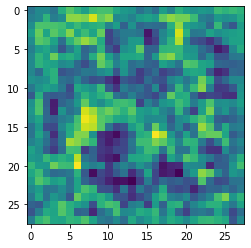

In [43]:
plt.imshow(generated_imgs[0].detach().cpu().permute(1, 2, 0))

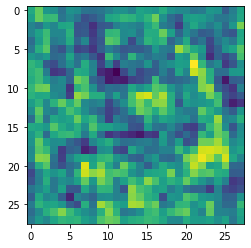

In [44]:
plt.imshow(generated_imgs[1].detach().cpu().permute(1, 2, 0))